Import required libraries

In [1]:
# !pip install numpy==1.21.0
# !pip install pandas==1.3.5
import pandas as pd
import os
%pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import string
import re
import matplotlib.pyplot as plt
import sys


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /home/samrawit/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
sys.path.append(os.path.abspath('../scripts'))
from utility import read_csv_file, clean_text, get_sentiment, sentiment_analysis_parallel, plot_articles_trends, calculate_and_plot, plot_day_month

[nltk_data] Downloading package words to /home/samrawit/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Read dataset

In [3]:
all_data_path = '../data/raw_analyst_ratings.csv'
text_data = read_csv_file(all_data_path)

In [4]:
text_data = text_data.get("data")
text_data.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:

path = "../data/yfinance_data/"

# List of dataset file paths
dataset_files = ["AAPL_historical_data.csv", "AMZN_historical_data.csv", "GOOG_historical_data.csv", "META_historical_data.csv", "MSFT_historical_data.csv", "NVDA_historical_data.csv", "TSLA_historical_data.csv"]  # Add your dataset filenames here

# Corresponding variable names for each dataset
dataset_vars = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

# Dictionary to store processed DataFrames
processed_data = {}

# Loop through each dataset
for file_name, var_name in zip(dataset_files, dataset_vars):
    # Load the dataset
    try:
        print(f"Processing {path + file_name}...")
        df = read_csv_file(path + file_name)

        df = df.get("data")
        
        # Parse the Date column
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        # Drop rows with invalid or missing Date
        df.dropna(subset=['Date'], inplace=True)
        
        # Select relevant columns
        selected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        missing_columns = [col for col in selected_columns if col not in df.columns]
        
        if missing_columns:
            print(f"Warning: {file_name} is missing columns: {missing_columns}")
            continue  # Skip this dataset
        
        df = df[selected_columns]
        
        # Dynamically assign the DataFrame to a variable
        globals()[var_name] = df
        
        # Store the processed DataFrame in the dictionary for additional access
        processed_data[var_name] = df
        
        # Display the first 5 rows
        print(f"First 5 rows of {var_name}:")
        print(df.head())
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")




Processing ../data/yfinance_data/AAPL_historical_data.csv...
First 5 rows of AAPL:
        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600
Processing ../data/yfinance_data/AMZN_historical_data.csv...
First 5 rows of AMZN:
        Date      Open      High       Low     Close  Adj Close      Volume
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
4 19

Split the date with space and convert it to date format

In [23]:
text_data['date'] = text_data['date'].astype(str)


# Split the date with space
text_data['extracted_date'] = text_data['date'].str.split(' ').str[0]

# Convert extracted date to datetime object (in the format YYYY-MM-DD)
text_data['formatted_date'] = pd.to_datetime(text_data['extracted_date'], errors='coerce').dt.strftime('%Y-%m-%d')


# Check for successful conversion and store validity
text_data['valid_date'] = text_data['formatted_date'].notna()



# Display the DataFrame
print(text_data[['date', 'formatted_date',   'valid_date']])

                              date formatted_date  valid_date
0        2020-06-05 10:30:54-04:00     2020-06-05        True
1        2020-06-03 10:45:20-04:00     2020-06-03        True
2        2020-05-26 04:30:07-04:00     2020-05-26        True
3        2020-05-22 12:45:06-04:00     2020-05-22        True
4        2020-05-22 11:38:59-04:00     2020-05-22        True
...                            ...            ...         ...
1407323        2011-08-29 00:00:00     2011-08-29        True
1407324        2011-06-22 00:00:00     2011-06-22        True
1407325        2011-06-21 00:00:00     2011-06-21        True
1407326        2011-06-21 00:00:00     2011-06-21        True
1407327        2011-05-12 00:00:00     2011-05-12        True

[1407328 rows x 3 columns]


In [24]:
text_data.isna().sum()

headline          0
url               0
publisher         0
date              0
stock             0
extracted_date    0
formatted_date    0
valid_date        0
dtype: int64

In [25]:
# Function to clean time strings
def clean_time_strings(time_str):
    try:
        # Split by '-' or '+', keeping only the part before the first occurrence
        time_str = time_str.split('-')[0].split('+')[0]
        # Keep only the part up to the third colon
        parts = time_str.split(':')
        if len(parts) >= 3:
            return ':'.join(parts[:3])  # Reconstruct the time
        else:
            return time_str  # Return the original if less than 3 parts
    except Exception:
        return None  # Return None if any exception occurs

text_data['date'] = text_data['date'].astype(str)

text_data['extracted_time'] = text_data['date'].str.split(' ').str[1]

# Apply the cleaning function
text_data['extracted_time'] = text_data['extracted_time'].apply(clean_time_strings)

# Print the cleaned data
print(text_data)

                                                  headline  \
0                  Stocks That Hit 52-Week Highs On Friday   
1               Stocks That Hit 52-Week Highs On Wednesday   
2                            71 Biggest Movers From Friday   
3             46 Stocks Moving In Friday's Mid-Day Session   
4        B of A Securities Maintains Neutral on Agilent...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1        https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2        htt

In [26]:
def convert_to_timestamp(time_str):
    try:
        # Combine time with today's date
        timestamp = pd.to_datetime(time_str, format='%H:%M:%S', errors='coerce').time()
        return timestamp
    except Exception:
        return None

# Apply the function to convert the time column
text_data['timestamp'] = text_data['extracted_time'].apply(convert_to_timestamp)


In [10]:
text_data.head()

,headline,url,publisher,date,stock,extracted_date,formatted_date,valid_date,extracted_time,timestamp
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54,10:30:54
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20,10:45:20
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07,04:30:07
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06,12:45:06
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59,11:38:59


In [13]:
text_data.isna().sum()

headline          0
url               0
publisher         0
date              0
stock             0
extracted_date    0
formatted_date    0
valid_date        0
extracted_time    0
timestamp         0
dtype: int64

In [27]:
text_data['date'] = text_data['date'].astype(str)

text_data['extracted_time'] = text_data['date'].str.split(' ').str[1]

# Convert extracted_time to datetime (using only the time portion)
text_data['formatted_time'] = pd.to_datetime(
    text_data['extracted_time'], 
    format='%H:%M:%S',  # Specify the expected time format
    errors='coerce'     # Handle invalid times gracefully
)

# Format the time as a string
text_data['formatted_time'] = text_data['formatted_time'].dt.strftime('%H:%M:%S')

# Check for valid times
text_data['valid_time'] = text_data['formatted_time'].notna()

print(text_data)

# Convert extracted date to datetime object (in the format YYYY-MM-DD)
# text_data['formatted_time'] = pd.to_datetime(text_data['extracted_time'], errors='coerce').dt.strftime('%H-%M-%S')

# text_data['valid_time'] = text_data['formatted_time'].notna()

print(text_data[['date', 'formatted_time',   'valid_time']])


                                                  headline  \
0                  Stocks That Hit 52-Week Highs On Friday   
1               Stocks That Hit 52-Week Highs On Wednesday   
2                            71 Biggest Movers From Friday   
3             46 Stocks Moving In Friday's Mid-Day Session   
4        B of A Securities Maintains Neutral on Agilent...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1        https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2        htt

In [15]:
text_data[text_data['formatted_time'].isna()]

,headline,url,publisher,date,stock,extracted_date,formatted_date,valid_date,extracted_time,timestamp,formatted_time,valid_time
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54-04:00,10:30:54,NaN,False
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20-04:00,10:45:20,NaN,False
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07-04:00,04:30:07,NaN,False
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06-04:00,12:45:06,NaN,False
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59-04:00,11:38:59,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1407266,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,2018-01-05 11:47:36-04:00,ZX,2018-01-05,2018-01-05,True,11:47:36-04:00,11:47:36,NaN,False
1407267,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,2017-12-06 09:12:01-04:00,ZX,2017-12-06,2017-12-06,True,09:12:01-04:00,09:12:01,NaN,False
1407268,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,2017-12-06 07:04:31-04:00,ZX,2017-12-06,2017-12-06,True,07:04:31-04:00,07:04:31,NaN,False
1407269,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,2017-11-15 06:04:52-04:00,ZX,2017-11-15,2017-11-15,True,06:04:52-04:00,06:04:52,NaN,False


In [29]:
text_data.rename(columns={'formatted_date': 'Date'}, inplace=True)

In [30]:
text_data['Date'] = pd.to_datetime(text_data['Date'])

# Extract year, month, day, and day_of_week
text_data['year'] = text_data['Date'].dt.year
text_data['month'] = text_data['Date'].dt.month
text_data['day'] = text_data['Date'].dt.day
text_data['day_of_week'] = text_data['Date'].dt.day_name()  # Get the full name of the weekday (e.g., 'Monday')

# Display the dataframe
text_data

,headline,url,publisher,date,stock,extracted_date,Date,valid_date,extracted_time,timestamp,formatted_time,valid_time,year,month,day,day_of_week
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54-04:00,10:30:54,NaN,False,2020,6,5,Friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20-04:00,10:45:20,NaN,False,2020,6,3,Wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07-04:00,04:30:07,NaN,False,2020,5,26,Tuesday
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06-04:00,12:45:06,NaN,False,2020,5,22,Friday
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59-04:00,11:38:59,NaN,False,2020,5,22,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,2011-08-29,2011-08-29,True,00:00:00,00:00:00,00:00:00,True,2011,8,29,Monday
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,2011-06-22,2011-06-22,True,00:00:00,00:00:00,00:00:00,True,2011,6,22,Wednesday
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday


In [18]:
text_data.columns

Index(['headline', 'url', 'publisher', 'date', 'stock', 'extracted_date',
       'Date', 'valid_date', 'extracted_time', 'timestamp', 'formatted_time',
       'valid_time', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [34]:
# text_data.rename(columns={'formatted_date': 'Date'}, inplace=True)

In [19]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   headline        1407328 non-null  object        
 1   url             1407328 non-null  object        
 2   publisher       1407328 non-null  object        
 3   date            1407328 non-null  object        
 4   stock           1407328 non-null  object        
 5   extracted_date  1407328 non-null  object        
 6   Date            1407328 non-null  datetime64[ns]
 7   valid_date      1407328 non-null  bool          
 8   extracted_time  1407328 non-null  object        
 9   timestamp       1407328 non-null  object        
 10  formatted_time  1351341 non-null  object        
 11  valid_time      1407328 non-null  bool          
 12  year            1407328 non-null  int32         
 13  month           1407328 non-null  int32         
 14  day             14

Analysis

In [20]:
# Ensure the 'date' column is in datetime format
text_data['Date'] = pd.to_datetime(text_data['Date'])

# Extract year, month, day, and day_of_week
text_data['year'] = text_data['Date'].dt.year
text_data['month'] = text_data['Date'].dt.month
text_data['day'] = text_data['Date'].dt.day
text_data['day_of_week'] = text_data['Date'].dt.day_name()  # Get the full name of the weekday (e.g., 'Monday')

# Function to calculate and plot
# def calculate_and_plot(text_data):
#     # Extract year, month, and day_of_week directly from the DatetimeIndex
#     text_data['year'] = text_data['Date'].dt.year
#     text_data['month'] = text_data['Date'].dt.month
#     text_data['day_of_week'] = text_data['Date'].dt.day_name()

#     # Count articles by day of the week (day_of_week column)
#     articles_per_day = text_data['day_of_week'].value_counts()

#     # Count articles over time (monthly trends) by grouping by year and month
#     articles_over_time = text_data.groupby(['year', 'month']).size().sort_index()

#     # Calculate the total number of articles published per day of the week across the entire dataset
#     articles_per_day_total = text_data.groupby('day_of_week').size()

#     # Calculate the average articles per day of the week across all years
#     total_days = len(text_data)  # Total number of days in the dataset
#     articles_per_day_avg = articles_per_day_total

#     # Ensure the order of the days of the week (Monday to Sunday)
#     ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#     articles_per_day_avg = articles_per_day_avg[ordered_days]

#     # Calculate the total articles per year
#     articles_per_year_total = text_data.groupby('year').size()

#     # Calculate the average articles per year (total number of articles per year divided by the number of years)
#     total_years = len(text_data['year'].unique())  # Count the number of unique years
#     articles_per_year_avg = articles_per_year_total / total_years  # Average per year

#     # Plotting
#     fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#     # Plot the articles per day of the week
#     axs[0].bar(articles_per_day_avg.index, articles_per_day_avg.values)
#     axs[0].set_title("Average Articles Per Day of the Week")
#     axs[0].set_xlabel("Day of the Week")
#     axs[0].set_ylabel("Average Articles")
    
#     # Plot the articles per year
#     axs[1].bar(articles_per_year_avg.index, articles_per_year_avg.values)
#     axs[1].set_title("Average Articles Per Year")
#     axs[1].set_xlabel("Year")
#     axs[1].set_ylabel("Average Articles")

#     # Display the plot
#     plt.tight_layout()
#     plt.show()

# Call the function
articles_per_day_avg, articles_per_year_avg = calculate_and_plot(text_data)

Average Articles Published Per Day of the Week (Monday to Sunday):
day_of_week
Monday       265164
Tuesday      296470
Wednesday    300940
Thursday     302595
Friday       217892
Saturday       7753
Sunday        16514
dtype: int64

Average Articles Published Per Year:
year
2009     11489
2010     81319
2011    131322
2012    122655
2013    121523
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
dtype: int64


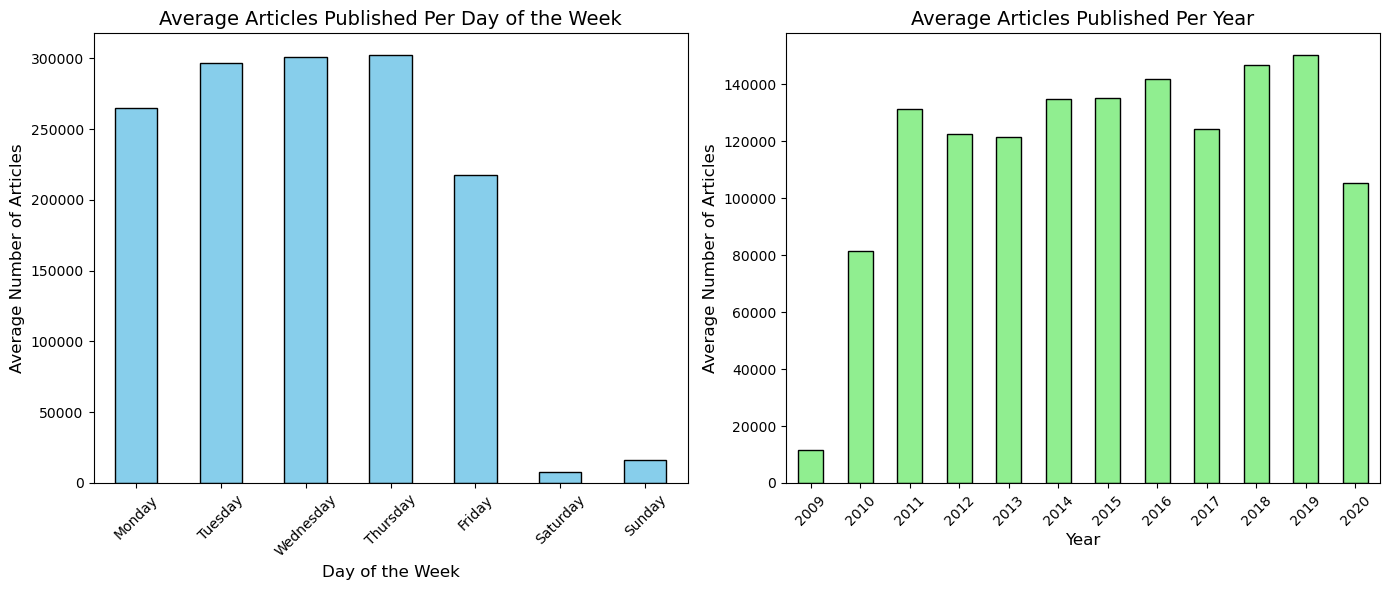

In [11]:
plot_articles_trends(articles_per_day_avg, articles_per_year_avg)

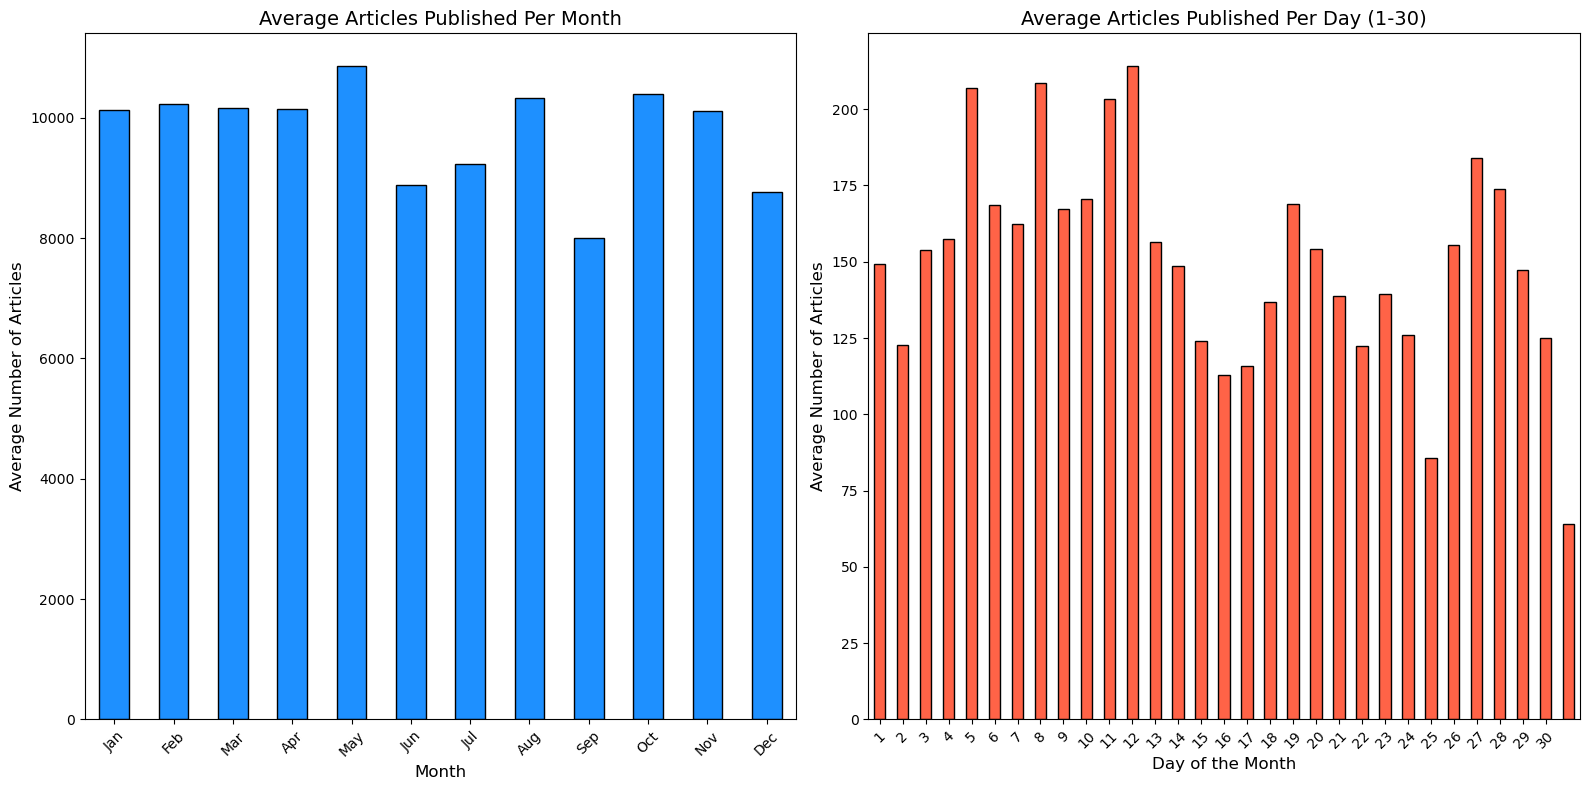

In [12]:
plot_day_month(text_data)

In [21]:
text_data

,headline,url,publisher,date,stock,extracted_date,Date,valid_date,extracted_time,timestamp,formatted_time,valid_time,year,month,day,day_of_week
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54-04:00,10:30:54,NaN,False,2020,6,5,Friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20-04:00,10:45:20,NaN,False,2020,6,3,Wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07-04:00,04:30:07,NaN,False,2020,5,26,Tuesday
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06-04:00,12:45:06,NaN,False,2020,5,22,Friday
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59-04:00,11:38:59,NaN,False,2020,5,22,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,2011-08-29,2011-08-29,True,00:00:00,00:00:00,00:00:00,True,2011,8,29,Monday
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,2011-06-22,2011-06-22,True,00:00:00,00:00:00,00:00:00,True,2011,6,22,Wednesday
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday


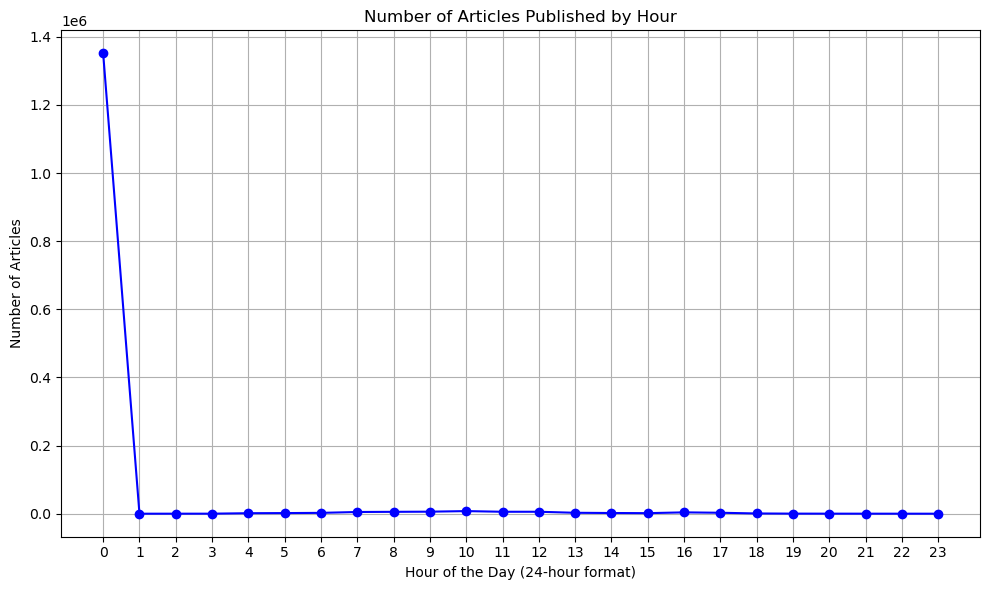

In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example time data
# data = {'time': ['10:30:54', '12:45:30', '10:15:15', '13:30:15', '10:45:30', '12:15:00']}
# text_data = pd.DataFrame(data)

# Convert time strings to datetime.time objects
text_data['time'] = pd.to_datetime(text_data['timestamp'], format='%H:%M:%S', errors='coerce').dt.time

# Extract the hour and minute for trend analysis
text_data['hour'] = pd.to_datetime(text_data['timestamp'], format='%H:%M:%S', errors='coerce').dt.hour
text_data['minute'] = pd.to_datetime(text_data['timestamp'], format='%H:%M:%S', errors='coerce').dt.minute

# articles_per_publisher = text_data['publisher'].value_counts()

# Group by hour to get the number of articles published in each hour
hourly_trend = text_data.groupby('hour').size()

# Plot the hourly trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', linestyle='-', color='b')
plt.title("Number of Articles Published by Hour")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Number of Articles")
plt.grid(True)

# Ensure x-ticks cover all hours (0 to 23)
plt.xticks(range(0, 24))

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
text_data

,headline,url,publisher,date,stock,extracted_date,Date,valid_date,extracted_time,timestamp,formatted_time,valid_time,year,month,day,day_of_week,time,hour,minute
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54-04:00,10:30:54,NaN,False,2020,6,5,Friday,10:30:54,10,30
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20-04:00,10:45:20,NaN,False,2020,6,3,Wednesday,10:45:20,10,45
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07-04:00,04:30:07,NaN,False,2020,5,26,Tuesday,04:30:07,4,30
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06-04:00,12:45:06,NaN,False,2020,5,22,Friday,12:45:06,12,45
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59-04:00,11:38:59,NaN,False,2020,5,22,Friday,11:38:59,11,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,2011-08-29,2011-08-29,True,00:00:00,00:00:00,00:00:00,True,2011,8,29,Monday,00:00:00,0,0
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,2011-06-22,2011-06-22,True,00:00:00,00:00:00,00:00:00,True,2011,6,22,Wednesday,00:00:00,0,0
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday,00:00:00,0,0
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,2011-06-21,2011-06-21,True,00:00:00,00:00:00,00:00:00,True,2011,6,21,Tuesday,00:00:00,0,0


Articles Published Per Hour:
hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


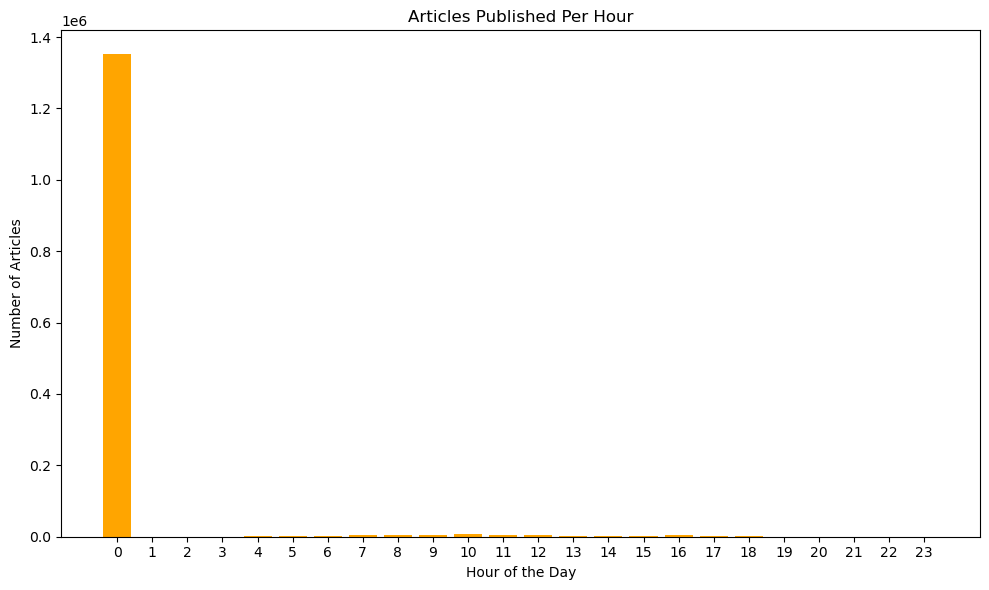

In [26]:
# Step 2: Count articles published per hour
articles_per_hour = text_data['hour'].value_counts().sort_index()

# Display the result
print("Articles Published Per Hour:")
print(articles_per_hour)

# Optional: Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(articles_per_hour.index, articles_per_hour.values, color='orange')
plt.title('Articles Published Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.tight_layout()
plt.show()

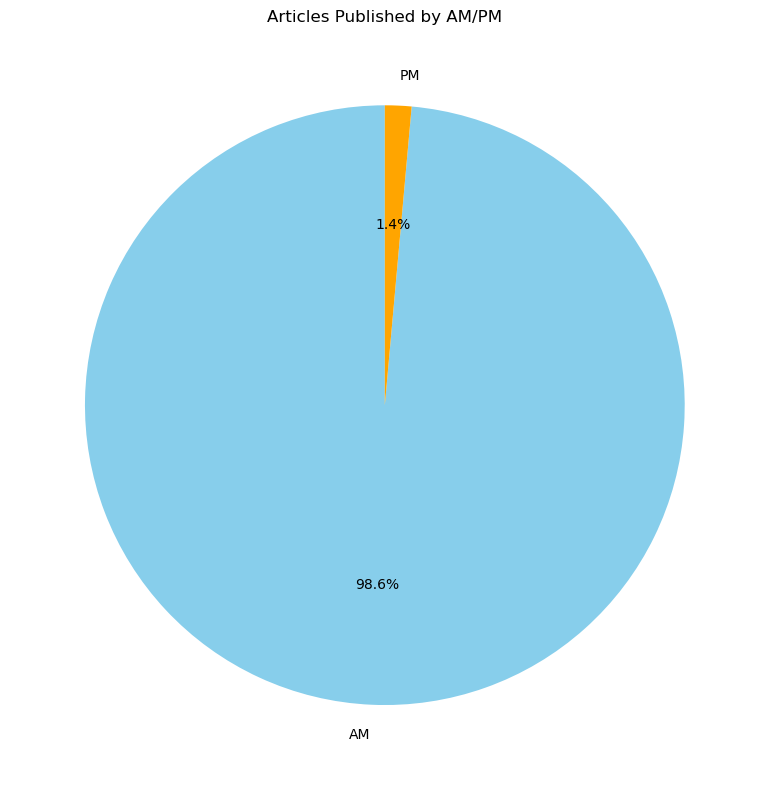

AM Articles: 1387241
PM Articles: 20087


In [28]:
# Group articles into AM (0-11) and PM (12-23)
am_articles = articles_per_hour.loc[0:11].sum()  # Sum of articles from 0 to 11 (AM)
pm_articles = articles_per_hour.loc[12:23].sum()  # Sum of articles from 12 to 23 (PM)

# Prepare data for the pie chart
labels = ['AM', 'PM']
values = [am_articles, pm_articles]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange']
)
plt.title('Articles Published by AM/PM')
plt.tight_layout()
plt.show()

# Optional: Print the counts
print(f"AM Articles: {am_articles}")
print(f"PM Articles: {pm_articles}")


In [17]:
text_data.head()

,headline,url,publisher,date,stock,extracted_date,Date,valid_date,extracted_time,timestamp,formatted_time,valid_time,year,month,day,day_of_week
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,2020-06-05,True,10:30:54-04:00,10:30:54,NaN,False,2020,6,5,Friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,2020-06-03,True,10:45:20-04:00,10:45:20,NaN,False,2020,6,3,Wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,2020-05-26,True,04:30:07-04:00,04:30:07,NaN,False,2020,5,26,Tuesday
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,2020-05-22,True,12:45:06-04:00,12:45:06,NaN,False,2020,5,22,Friday
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,2020-05-22,True,11:38:59-04:00,11:38:59,NaN,False,2020,5,22,Friday


In [36]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [9]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the sample data (ensure to have 1000 non-null headlines)
sample_data = text_data['headlineClean'].dropna().sample(n=1000, random_state=42).tolist()

# Initialize embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize and fit BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=10)
topics, probs = topic_model.fit_transform(sample_data)

# Check topic information and ensure topics are created
topic_info = topic_model.get_topic_info()
print(f"Topic Information:\n{topic_info}")

# If topics exist, try visualizing
if len(topic_info) > 0:
    try:
        # Visualizing topic clusters
        fig_topics = topic_model.visualize_topics()
        fig_topics.show()

        # Visualizing the frequency of topics in a bar chart
        fig_barchart = topic_model.visualize_barchart()
        fig_barchart.show()
    except Exception as e:
        print(f"Error during visualization: {e}")
else:
    print("No topics were generated. Skipping visualizations.")


Topic Information:
    Topic  Count                                      Name  \
0      -1    218                -1_oil_hearing_capital_gas   
1       0     78                   0_yoy_year_neutral_last   
2       1     39             1_agreement_merger_bid_patent   
3       2     39             2_trading_several_higher_amid   
4       3     39                 3_target_price_buy_rating   
5       4     33                    4_hold_bank_money_fast   
6       5     32                     5_hit_week_stock_post   
7       6     30                    6_top_looking_bal_swan   
8       7     29          7_morgan_overweight_target_price   
9       8     28                   8_like_dang_almost_dont   
10      9     26               9_moving_session_stock_move   
11     10     25       10_investment_common_share_offering   
12     11     25                  11_buy_gold_cantor_riley   
13     12     24      12_earnings_income_competition_recap   
14     13     24                  13_watch_stock_ju

8  total email 
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


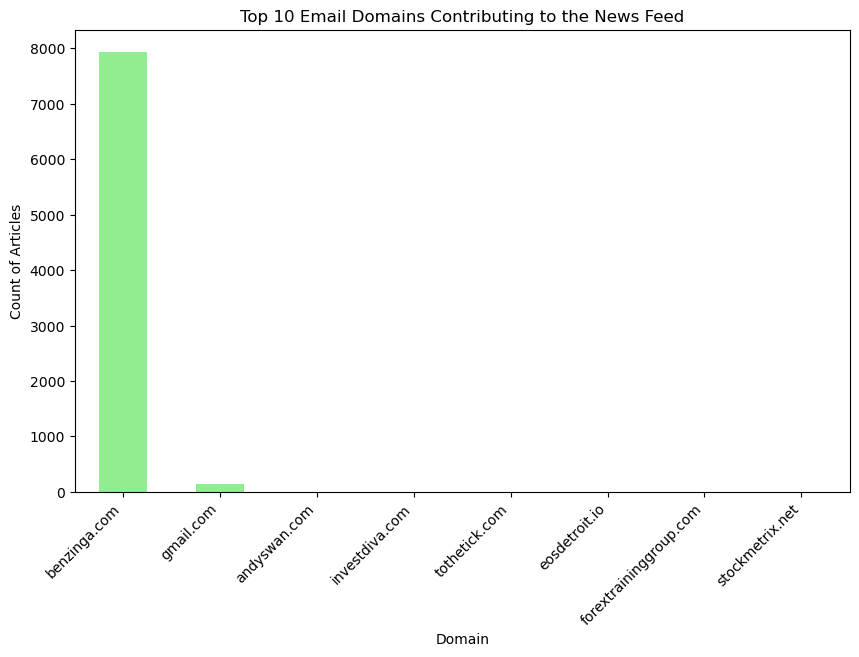

In [12]:
# Extract domains from email addresses
text_data['publisher_domain'] = text_data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in str(x) else None)

# Count unique domains
domain_counts = text_data['publisher_domain'].value_counts()

print(len(domain_counts) , " total email ")

# Show top domains contributing to the feed
print(domain_counts.head(10))

# Visualize top domains
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Email Domains Contributing to the News Feed")
plt.xlabel("Domain")
plt.ylabel("Count of Articles")
plt.xticks(rotation=45, ha="right")
plt.show()


Identified Topics:
Topic 1: trading, stock, notable, disclosed, outlook, today, research, lower, technology, common
Topic 2: earnings, market, buy, update, higher, company, coverage, trading, yoy, morning
Topic 3: revenue, estimate, share, year, neutral, corporation, update, dividend, following, beat
Topic 4: price, target, update, morgan, outperform, bank, biggest, option, hold, alert
Topic 5: stock, week, session, moving, new, hit, set, industry, high, midday


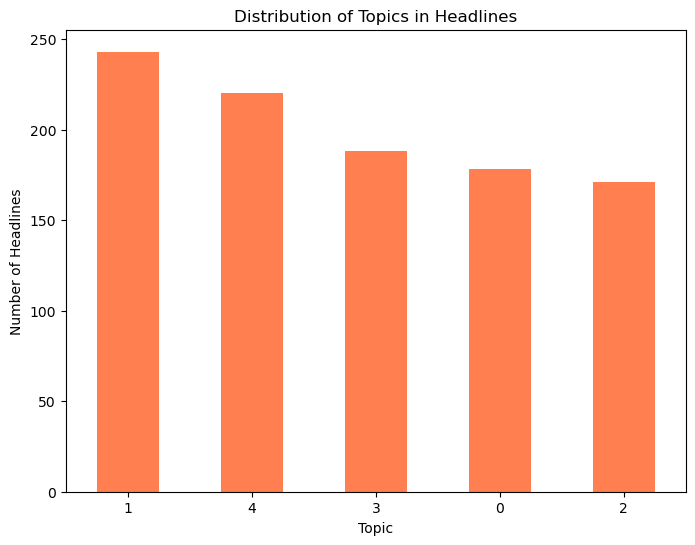

Results saved to 'headline_topics.csv'


In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Sample data: Replace this with your actual dataset
np.random.seed(42)


# Step 1: Randomly sample 1000 rows
text_data_sampled = text_data.sample(n=1000, random_state=42)

# Step 2: Preprocess the 'headlineClean' Column
text_data_sampled['headlineClean'] = text_data_sampled['headlineClean'].str.lower().str.strip()

# Step 3: Vectorize the Publisher Names
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
publisher_matrix = vectorizer.fit_transform(text_data_sampled['headlineClean'])

# Step 4: Apply Topic Modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics
lda_model.fit(publisher_matrix)

# Step 5: Extract topics
terms = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_terms = [terms[i] for i in topic.argsort()[:-11:-1]]  # Top 10 terms per topic
    topics.append(top_terms)

# Print identified topics
print("Identified Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

# Step 6: Assign Topics to Headlines
publisher_topic_distribution = lda_model.transform(publisher_matrix)
text_data_sampled['dominant_topic'] = publisher_topic_distribution.argmax(axis=1)

# Step 7: Visualize Topic Distribution
topic_counts = text_data_sampled['dominant_topic'].value_counts()

plt.figure(figsize=(8, 6))
topic_counts.plot(kind='bar', color='coral')
plt.title("Distribution of Topics in Headlines")
plt.xlabel("Topic")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=0)
plt.show()

# Step 8: Save results (optional)
text_data_sampled[['headlineClean', 'dominant_topic']].to_csv('headline_topics.csv', index=False)
print("Results saved to 'headline_topics.csv'")


Get APPLE companies stock dataset

In [21]:
# Access the AAPL dataset
aapl_df = processed_data["AAPL"]

# Display the first 5 rows of the AAPL dataset
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [22]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10998 non-null  float64
 1   High       10998 non-null  float64
 2   Low        10998 non-null  float64
 3   Close      10998 non-null  float64
 4   Adj Close  10998 non-null  float64
 5   Volume     10998 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 601.5 KB


In [24]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], errors='coerce')

# Set 'Date' as the index
aapl_df.set_index('Date', inplace=True)

In [25]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


In [27]:
# Ensure 'Date' column is in datetime format
text_data['Date'] = pd.to_datetime(text_data['Date'], errors='coerce')

# Set 'Date' as the index
text_data.set_index('Date', inplace=True)

In [32]:
text_data.drop(columns=['extracted_date', 'valid_date', 'date'], inplace=True)

In [15]:
text_data['headlineClean'] = text_data['headline'].apply(clean_text)

text_data[['headline', 'headlineClean']]

,headline,headlineClean
0,Stocks That Hit 52-Week Highs On Friday,stock hit week
1,Stocks That Hit 52-Week Highs On Wednesday,stock hit week
2,71 Biggest Movers From Friday,biggest
3,46 Stocks Moving In Friday's Mid-Day Session,stock moving midday session
4,B of A Securities Maintains Neutral on Agilent...,neutral price target
...,...,...
1407323,Top Narrow Based Indexes For August 29,top narrow based august
1407324,Recap: Wednesday's Top Percentage Gainers and ...,recap top percentage
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,update color china auto initiation
1407326,Oppenheimer Initiates China Zenix At Outperfor...,china outperform


In [37]:
text_data.head()

,headline,url,publisher,stock,headlineClean
Date,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,stock hit week
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,stock hit week
2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,biggest
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,stock moving midday session
2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,neutral price target


Merge AAPL with rating dataset

In [38]:
aapl_merged_data = pd.merge(text_data, aapl_df, left_on='Date', right_index=True, how='inner')


In [39]:
aapl_merged_data.head()

,headline,url,publisher,stock,headlineClean,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,stock hit week,80.837502,82.937500,80.807503,82.875000,80.843407,137250400
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,stock hit week,81.165001,81.550003,80.574997,81.279999,79.287506,104491200
2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,biggest,80.875000,81.059998,79.125000,79.182503,77.241432,125522000
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,stock moving midday session,78.942497,79.807503,78.837502,79.722504,77.768188,81803200
2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,neutral price target,78.942497,79.807503,78.837502,79.722504,77.768188,81803200


In [40]:
# Filter rows where 'headline' contains "AAPL"
aapl_related_data = aapl_merged_data[aapl_merged_data['headline'].str.contains("AAPL", case=False, na=False)]

# Display the filtered DataFrame
aapl_related_data

,headline,url,publisher,stock,headlineClean,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,
2009-08-27,China Unicom(CHU) to Launch Apple (AAPL) Iphone,https://www.benzinga.com/benzingastaff1/2009/8...,BenzingaStaff1,A,china launch apple,6.026786,6.056071,5.886786,6.051786,5.110583,449181600
2011-06-23,At Least We Still Have Apple (AAPL),https://www.benzinga.com/11/06/1204120/at-leas...,Kevin McElroy,AA,least still apple,11.390714,11.846071,11.361429,11.829643,9.989842,559759200
2011-01-11,"Tuesday's Mid-Day Options Volume Leaders (BAC,...",https://www.benzinga.com/options/11/01/770225/...,Michael J. Zerinskas,AA,midday volume bac,12.317143,12.320000,12.123929,12.201429,10.303806,444108000
2011-01-10,"Monday's Mid-Day Options Volume Leaders (C, AA...",https://www.benzinga.com/options/11/01/766490/...,Michael J. Zerinskas,AA,midday volume bac,12.101071,12.258214,12.041786,12.230357,10.328234,448560000
2011-01-07,Earnings For The S&P 500 Expected To Be Highes...,https://www.benzinga.com/news/11/01/761590/ear...,Roger Nachman,AA,earnings highest cat dow,11.928214,12.012500,11.853571,12.004286,10.137321,311931200
...,...,...,...,...,...,...,...,...,...,...,...
2010-02-03,"Mad Money Lightning Round: Jim Prefers MRK, SY...",https://www.benzinga.com/media/cnbc/109830/mad...,Monica Gerson,ZMH,mad money lightning round mot,6.970357,7.150000,6.943571,7.115357,6.008742,615328000
2014-04-24,"ETF Outlook for Thursday, April 24, 2014 (XLK,...",https://www.benzinga.com/etfs/sector-etfs/14/0...,Matthew McCall,ZNGA,outlook,20.293215,20.357143,20.026072,20.277500,17.815914,759911600
2012-05-29,Stocks to Watch for the All Things Digital Con...,https://www.benzinga.com/trading-ideas/long-id...,Alex Shek,ZNGA,stock watch digital conference,20.389286,20.500000,20.189644,20.438213,17.259563,380508800
